### 스타벅스, 이디야 매장 위치비교

- 맥도날드는 위치선정시, 각 연령별로 유동인구수 체크 매장 입지 선정
- 롯데리아는 맥도날드가 선정한 위치 근처에 매장을 개설
- 스타벅스도 거의 동일, 이디야도 스타벅스 근처에 입점한다고 함

#### 데이터셋 생성
- 공공데이터 포털 내 소상공인진흥공단 상가,상권 분석 정보 활용
    - https://www.data.go.kr/data/15083033/fileData.do 
    - csv 압축파일 다운로드, 서울 정보 압축해제

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

#### 플롯에서 한글 깨짐 방지

In [3]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

sns.set_theme(style='darkgrid', palette='deep', font='NanumGothic')

#### 서울 상권정보 CSV 로드

In [4]:
df = pd.read_csv('./data/소상공인시장진흥공단_상가(상권)정보_서울_202409.csv', encoding='utf-8')
df.shape

C:\Users\user\AppData\Local\Temp\ipykernel_25504\147041081.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/소상공인시장진흥공단_상가(상권)정보_서울_202409.csv', encoding='utf-8')


(466022, 39)

In [5]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
1,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053
2,MA010120220805430797,가배차,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1171010400101430002012823,사이언스빌딩,서울특별시 송파구 가락로 209,138852,5663,NaN,1,NaN,127.116136,37.507170
3,MA010120220805430812,비에이치씨항동점,NaN,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1153011200101000005000001,항동중흥에스클래스베르데카운티,서울특별시 구로구 연동로 233,152140,8362,NaN,1,NaN,126.820686,37.481640
4,MA010120220805430834,무지개삼성약국,NaN,G2,소매,G215,의약·화장품 소매,G21501,약국,G47811,...,1168011400106840005002734,대훈빌딩,서울특별시 강남구 일원로 45,135516,6343,NaN,NaN,NaN,127.081499,37.489893


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466022 entries, 0 to 466021
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     466022 non-null  object 
 1   상호명        466022 non-null  object 
 2   지점명        11406 non-null   object 
 3   상권업종대분류코드  466022 non-null  object 
 4   상권업종대분류명   466022 non-null  object 
 5   상권업종중분류코드  466022 non-null  object 
 6   상권업종중분류명   466022 non-null  object 
 7   상권업종소분류코드  466022 non-null  object 
 8   상권업종소분류명   466022 non-null  object 
 9   표준산업분류코드   465931 non-null  object 
 10  표준산업분류명    465931 non-null  object 
 11  시도코드       466022 non-null  int64  
 12  시도명        466022 non-null  object 
 13  시군구코드      466022 non-null  int64  
 14  시군구명       466022 non-null  object 
 15  행정동코드      466022 non-null  int64  
 16  행정동명       466022 non-null  object 
 17  법정동코드      466022 non-null  int64  
 18  법정동명       466022 non-null  object 
 19  지번코드       466022 non-n

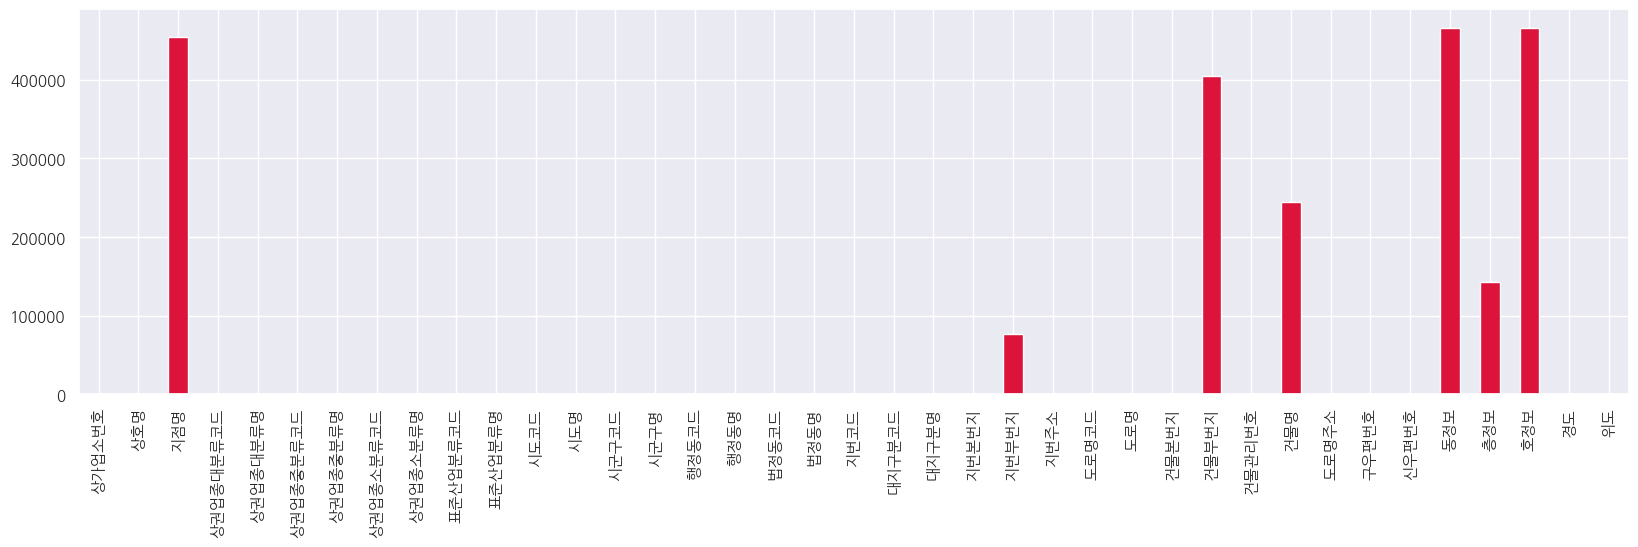

In [7]:
## 결측치 확인을 바차트로 변경
df.isna().sum().plot.bar(figsize=(20, 5), color='crimson')

plt.show()

##### 필요컬럼만 추출

In [8]:
columns = ['상호명', '상권업종소분류명', '시도명', '시군구명', '지번주소', '도로명주소', '경도', '위도']

df_business = df[columns].copy()

In [9]:
df_business.head()

,상호명,상권업종소분류명,시도명,시군구명,지번주소,도로명주소,경도,위도
0,이상한스냅,사진촬영업,서울특별시,양천구,서울특별시 양천구 신월동 9-4,서울특별시 양천구 월정로 283,126.828832,37.542117
1,토끼정,백반/한정식,서울특별시,강서구,서울특별시 강서구 마곡동 774-12,서울특별시 강서구 마곡동로 55,126.833022,37.560053
2,가배차,백반/한정식,서울특별시,송파구,서울특별시 송파구 송파동 143-2,서울특별시 송파구 가락로 209,127.116136,37.507170
3,비에이치씨항동점,치킨,서울특별시,구로구,서울특별시 구로구 항동 100-5,서울특별시 구로구 연동로 233,126.820686,37.481640
4,무지개삼성약국,약국,서울특별시,강남구,서울특별시 강남구 일원동 684-5,서울특별시 강남구 일원로 45,127.081499,37.489893


In [11]:
df_business[ df_business['시도명'] == '서울특별시' ].count()

상호명         466022
상권업종소분류명    466022
시도명         466022
시군구명        466022
지번주소        466022
도로명주소       466022
경도          466022
위도          466022
dtype: int64

In [13]:
# 상권업종소분류명으로 카페를 검색
df_business[ df_business['상권업종소분류명'] == '카페' ].count()

상호명         20454
상권업종소분류명    20454
시도명         20454
시군구명        20454
지번주소        20454
도로명주소       20454
경도          20454
위도          20454
dtype: int64

In [14]:
##### 상권업종소분류명 카페로 필터링
df_cafe = df_business[ df_business['상권업종소분류명'] == '카페' ].copy()

In [15]:
df_cafe.head()

,상호명,상권업종소분류명,시도명,시군구명,지번주소,도로명주소,경도,위도
7,카페숲,카페,서울특별시,금천구,서울특별시 금천구 시흥동 929-10,서울특별시 금천구 시흥대로40길 129,126.909939,37.446689
51,매머드커피외대,카페,서울특별시,동대문구,서울특별시 동대문구 이문동 264-223,서울특별시 동대문구 천장산로7길 16,127.056962,37.598493
53,포르마레,카페,서울특별시,강동구,서울특별시 강동구 성내동 534-7,서울특별시 강동구 성내로9길 35,127.125070,37.530474
111,더웨이유통할리스커피,카페,서울특별시,중구,서울특별시 중구 신당동 368-66,서울특별시 중구 다산로 114,127.010407,37.553952
116,카페브릿지,카페,서울특별시,영등포구,서울특별시 영등포구 여의도동 22,서울특별시 영등포구 여의대로 108,126.929094,37.525184


##### 카페 데이터프레임에서 이디야, 스타벅스 확인

In [18]:
# 카페데이터 4만여개중 이디야는 496개 존재
df_cafe['상호명'].str.contains('이디야|이디아|ediya').sum()

496

In [20]:
# 스타벅스는 0개
df_cafe['상호명'].str.contains('스타벅스|starbucks').sum()

0

In [24]:
df_ediya = df_cafe[ df_cafe['상호명'].str.contains('이디야|이디아|ediya') ].copy()

In [25]:
df_ediya.shape

(496, 8)

In [26]:
df_ediya.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 175 to 464427
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       496 non-null    object 
 1   상권업종소분류명  496 non-null    object 
 2   시도명       496 non-null    object 
 3   시군구명      496 non-null    object 
 4   지번주소      496 non-null    object 
 5   도로명주소     496 non-null    object 
 6   경도        496 non-null    float64
 7   위도        496 non-null    float64
dtypes: float64(2), object(6)
memory usage: 34.9+ KB


In [27]:
df_ediya.tail()

,상호명,상권업종소분류명,시도명,시군구명,지번주소,도로명주소,경도,위도
456925,이디야커피가락,카페,서울특별시,송파구,서울특별시 송파구 가락동 48,서울특별시 송파구 송이로 87,127.120775,37.498338
459225,이디야용산,카페,서울특별시,용산구,서울특별시 용산구 한강로3가 60,서울특별시 용산구 한강대로 52-1,126.964637,37.525419
461959,이디야등촌3동성당점,카페,서울특별시,강서구,서울특별시 강서구 등촌동 667-7,서울특별시 강서구 강서로56길 110,126.844857,37.558863
463911,이디야커피중계,카페,서울특별시,노원구,서울특별시 노원구 중계동 84-19,서울특별시 노원구 중계로14바길 2,127.082558,37.649874
464427,이디야천호1동점,카페,서울특별시,강동구,서울특별시 강동구 천호동 395-78,서울특별시 강동구 구천면로34길 43,127.133575,37.542539


In [ ]:
## 기존 464427가는 인덱스가 잘못됨. 인덱스 초기화
df_ediya.reset_index(inplace=True)

In [29]:
df_ediya.tail()

,index,상호명,상권업종소분류명,시도명,시군구명,지번주소,도로명주소,경도,위도
491,456925,이디야커피가락,카페,서울특별시,송파구,서울특별시 송파구 가락동 48,서울특별시 송파구 송이로 87,127.120775,37.498338
492,459225,이디야용산,카페,서울특별시,용산구,서울특별시 용산구 한강로3가 60,서울특별시 용산구 한강대로 52-1,126.964637,37.525419
493,461959,이디야등촌3동성당점,카페,서울특별시,강서구,서울특별시 강서구 등촌동 667-7,서울특별시 강서구 강서로56길 110,126.844857,37.558863
494,463911,이디야커피중계,카페,서울특별시,노원구,서울특별시 노원구 중계동 84-19,서울특별시 노원구 중계로14바길 2,127.082558,37.649874
495,464427,이디야천호1동점,카페,서울특별시,강동구,서울특별시 강동구 천호동 395-78,서울특별시 강동구 구천면로34길 43,127.133575,37.542539


- 2022년 까지는 소상공인 데이터에 스타벅스가 포함되어 있었음
- 현재는 스타벅스 데이터가 존재하지 않음
- 스타벅스 데이터는 스타벅스 사이트에서 selenium으로 추출한 데이터를 활용

#### 지난주 Selenium으로 추출한 스타벅스 매장정보

In [21]:
df_starbuck = pd.read_csv('./data/스타벅스_서울매장정보.csv', encoding='utf-8')

In [23]:
df_starbuck.tail()

,매장명,위도,경도,구,주소,전화번호,매장타입
622,상봉역,37.596890,127.086470,중랑구,서울특별시 중랑구 망우로 307 (상봉동),1522-3232,general
623,묵동,37.615368,127.076633,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",1522-3232,general
624,망우동,37.599508,127.097539,중랑구,서울특별시 중랑구 망우로 407 (망우동),1522-3232,general
625,양원역,37.606654,127.106360,중랑구,서울특별시 중랑구 양원역로10길 3 (망우동),1522-3232,general
626,중화역,37.601709,127.078411,중랑구,서울특별시 중랑구 봉화산로 35 1층,1522-3232,general


In [22]:
df_starbuck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매장명     627 non-null    object 
 1   위도      627 non-null    float64
 2   경도      627 non-null    float64
 3   구       627 non-null    object 
 4   주소      627 non-null    object 
 5   전화번호    627 non-null    object 
 6   매장타입    627 non-null    object 
dtypes: float64(2), object(5)
memory usage: 34.4+ KB


##### 두 데이터프레임 합치기

In [31]:
df_starbuck.tail()

,매장명,위도,경도,구,주소,전화번호,매장타입
622,상봉역,37.596890,127.086470,중랑구,서울특별시 중랑구 망우로 307 (상봉동),1522-3232,general
623,묵동,37.615368,127.076633,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",1522-3232,general
624,망우동,37.599508,127.097539,중랑구,서울특별시 중랑구 망우로 407 (망우동),1522-3232,general
625,양원역,37.606654,127.106360,중랑구,서울특별시 중랑구 양원역로10길 3 (망우동),1522-3232,general
626,중화역,37.601709,127.078411,중랑구,서울특별시 중랑구 봉화산로 35 1층,1522-3232,general


In [32]:
df_ediya.tail()

,index,상호명,상권업종소분류명,시도명,시군구명,지번주소,도로명주소,경도,위도
491,456925,이디야커피가락,카페,서울특별시,송파구,서울특별시 송파구 가락동 48,서울특별시 송파구 송이로 87,127.120775,37.498338
492,459225,이디야용산,카페,서울특별시,용산구,서울특별시 용산구 한강로3가 60,서울특별시 용산구 한강대로 52-1,126.964637,37.525419
493,461959,이디야등촌3동성당점,카페,서울특별시,강서구,서울특별시 강서구 등촌동 667-7,서울특별시 강서구 강서로56길 110,126.844857,37.558863
494,463911,이디야커피중계,카페,서울특별시,노원구,서울특별시 노원구 중계동 84-19,서울특별시 노원구 중계로14바길 2,127.082558,37.649874
495,464427,이디야천호1동점,카페,서울특별시,강동구,서울특별시 강동구 천호동 395-78,서울특별시 강동구 구천면로34길 43,127.133575,37.542539


##### 스타벅스 매장명 앞에 '스타벅스' 문자열 추가

In [34]:
df_starbuck['매장명'] = '스타벅스' + df_starbuck['매장명']

In [35]:
df_starbuck.tail()

,매장명,위도,경도,구,주소,전화번호,매장타입
622,스타벅스상봉역,37.596890,127.086470,중랑구,서울특별시 중랑구 망우로 307 (상봉동),1522-3232,general
623,스타벅스묵동,37.615368,127.076633,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",1522-3232,general
624,스타벅스망우동,37.599508,127.097539,중랑구,서울특별시 중랑구 망우로 407 (망우동),1522-3232,general
625,스타벅스양원역,37.606654,127.106360,중랑구,서울특별시 중랑구 양원역로10길 3 (망우동),1522-3232,general
626,스타벅스중화역,37.601709,127.078411,중랑구,서울특별시 중랑구 봉화산로 35 1층,1522-3232,general


##### 각 데이터프레임에 '브랜드명' 컬럼 추가

In [36]:
df_ediya['브랜드명'] = '이디야'

In [37]:
df_ediya.tail()

,index,상호명,상권업종소분류명,시도명,시군구명,지번주소,도로명주소,경도,위도,브랜드명
491,456925,이디야커피가락,카페,서울특별시,송파구,서울특별시 송파구 가락동 48,서울특별시 송파구 송이로 87,127.120775,37.498338,이디야
492,459225,이디야용산,카페,서울특별시,용산구,서울특별시 용산구 한강로3가 60,서울특별시 용산구 한강대로 52-1,126.964637,37.525419,이디야
493,461959,이디야등촌3동성당점,카페,서울특별시,강서구,서울특별시 강서구 등촌동 667-7,서울특별시 강서구 강서로56길 110,126.844857,37.558863,이디야
494,463911,이디야커피중계,카페,서울특별시,노원구,서울특별시 노원구 중계동 84-19,서울특별시 노원구 중계로14바길 2,127.082558,37.649874,이디야
495,464427,이디야천호1동점,카페,서울특별시,강동구,서울특별시 강동구 천호동 395-78,서울특별시 강동구 구천면로34길 43,127.133575,37.542539,이디야


In [38]:
df_starbuck['브랜드명'] = '스타벅스'

In [39]:
df_starbuck.tail()

,매장명,위도,경도,구,주소,전화번호,매장타입,브랜드명
622,스타벅스상봉역,37.596890,127.086470,중랑구,서울특별시 중랑구 망우로 307 (상봉동),1522-3232,general,스타벅스
623,스타벅스묵동,37.615368,127.076633,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",1522-3232,general,스타벅스
624,스타벅스망우동,37.599508,127.097539,중랑구,서울특별시 중랑구 망우로 407 (망우동),1522-3232,general,스타벅스
625,스타벅스양원역,37.606654,127.106360,중랑구,서울특별시 중랑구 양원역로10길 3 (망우동),1522-3232,general,스타벅스
626,스타벅스중화역,37.601709,127.078411,중랑구,서울특별시 중랑구 봉화산로 35 1층,1522-3232,general,스타벅스


##### 두 DF에서 공통된 컬럼만 추출
- 매장명(상호명), 구명, 도로명주소(주소), 위도, 경도, 브랜드명

In [41]:
# 컬럼순서를 변경하고자 하면 순서만 바꾸면 됨
df_ediya = df_ediya[['브랜드명', '상호명', '시군구명', '도로명주소', '위도', '경도']]

In [43]:
df_starbuck = df_starbuck[['브랜드명', '매장명', '구', '주소', '위도', '경도']]

##### DF 합치기

In [45]:
# pd.merge() = SQL에 Join 하고 동일, INNER JOIN, LEFT(RIGHT) OUTER JOIN
# pd.concat() # SQL UNION 하고 동일
pd.concat([df_starbuck, df_ediya], ignore_index=True)
# 컬럼명이 다르면 concat는 컬럼을 합칠수 없음

,브랜드명,매장명,구,주소,위도,경도,상호명,시군구명,도로명주소
0,스타벅스,스타벅스역삼아레나빌딩,강남구,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069,NaN,NaN,NaN
1,스타벅스,스타벅스논현역사거리,강남구,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223,NaN,NaN,NaN
2,스타벅스,스타벅스신사역성일빌딩,강남구,서울특별시 강남구 강남대로 584 (논현동),37.513931,127.020606,NaN,NaN,NaN
3,스타벅스,스타벅스국기원사거리,강남구,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495,NaN,NaN,NaN
4,스타벅스,스타벅스대치재경빌딩,강남구,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1118,이디야,NaN,NaN,NaN,37.498338,127.120775,이디야커피가락,송파구,서울특별시 송파구 송이로 87
1119,이디야,NaN,NaN,NaN,37.525419,126.964637,이디야용산,용산구,서울특별시 용산구 한강대로 52-1
1120,이디야,NaN,NaN,NaN,37.558863,126.844857,이디야등촌3동성당점,강서구,서울특별시 강서구 강서로56길 110
1121,이디야,NaN,NaN,NaN,37.649874,127.082558,이디야커피중계,노원구,서울특별시 노원구 중계로14바길 2


##### 이디야 DF 컬럼명을 스타벅스와 동일하게 변경

In [46]:
df_ediya.columns = ['브랜드명', '매장명', '구', '주소', '위도', '경도']

In [48]:
# 재시도
df_total = pd.concat([df_starbuck, df_ediya], ignore_index=True)

In [52]:
df_total.tail()

,브랜드명,매장명,구,주소,위도,경도
1118,이디야,이디야커피가락,송파구,서울특별시 송파구 송이로 87,37.498338,127.120775
1119,이디야,이디야용산,용산구,서울특별시 용산구 한강대로 52-1,37.525419,126.964637
1120,이디야,이디야등촌3동성당점,강서구,서울특별시 강서구 강서로56길 110,37.558863,126.844857
1121,이디야,이디야커피중계,노원구,서울특별시 노원구 중계로14바길 2,37.649874,127.082558
1122,이디야,이디야천호1동점,강동구,서울특별시 강동구 구천면로34길 43,37.542539,127.133575


In [ ]:
# 최종 데이터프레임 저장, 저장시는 인덱스는 빼세요
df_total.to_csv('./data/서울_스타벅스_이디야_매장정보.csv', encoding='utf-8', index=False)

### 데이터 시각화

#### 브랜드별 매장수

In [ ]:
## 넘파이이 ndarray 형태로 표시
df_total['브랜드명'].values # 속성

array(['스타벅스', '스타벅스', '스타벅스', ..., '이디야', '이디야', '이디야'], dtype=object)

In [59]:
df_total['브랜드명'].value_counts() # 함수

브랜드명
스타벅스    627
이디야     496
Name: count, dtype: int64

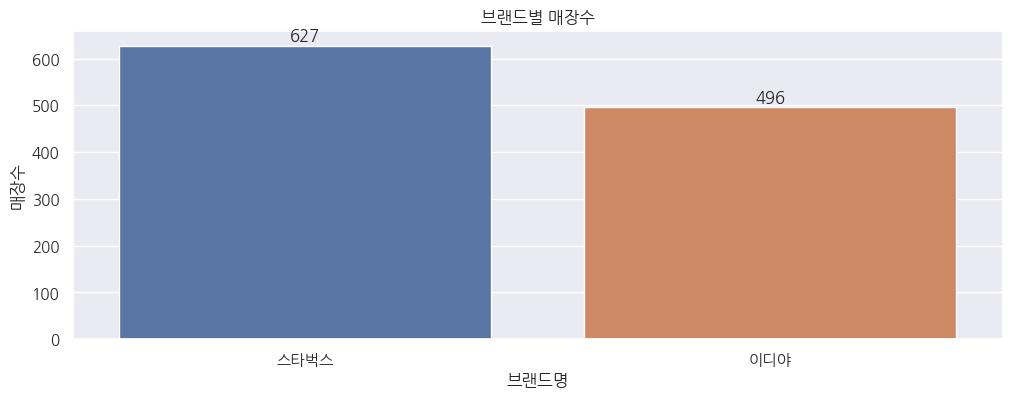

In [91]:
# matplotlib bar 차트나 seaborn countplot를 사용해도 됨
_, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data=df_total, x='브랜드명', hue='브랜드명')

for p in ax.patches: # x축 값을 반복해서
    ax.text(p.get_x() + (p.get_width() / 2),   # 각 x축값, 바넓이를 반으로 나눈 위치
            p.get_y() + p.get_height() + 10,   # 각 y축값 + 바높이(값크기)
            f'{p.get_height():.0f}',  # 표시할 데이터 값(바 높이)
            ha='center') # 좌우정렬 중간

plt.title('브랜드별 매장수')
plt.ylabel('매장수')
plt.show() ## matplotlib 추가메시지를 표시하지 않음

In [103]:
df_total.groupby(['구', '브랜드명'])['매장명'].count()

구     브랜드명
강남구   스타벅스    94
      이디야     28
강동구   스타벅스    18
      이디야     21
강북구   스타벅스     7
      이디야     10
강서구   스타벅스    28
      이디야     27
관악구   스타벅스    13
      이디야     18
광진구   스타벅스    19
      이디야     16
구로구   스타벅스    14
      이디야     20
금천구   스타벅스    15
      이디야     13
노원구   스타벅스    15
      이디야     17
도봉구   스타벅스     7
      이디야     15
동대문구  스타벅스    13
      이디야     20
동작구   스타벅스    11
      이디야     15
마포구   스타벅스    37
      이디야     24
서대문구  스타벅스    21
      이디야     14
서초구   스타벅스    50
      이디야     23
성동구   스타벅스    15
      이디야     15
성북구   스타벅스    16
      이디야     23
송파구   스타벅스    37
      이디야     26
양천구   스타벅스    17
      이디야     16
영등포구  스타벅스    41
      이디야     34
용산구   스타벅스    25
      이디야     12
은평구   스타벅스    14
      이디야     18
종로구   스타벅스    39
      이디야     25
중구    스타벅스    52
      이디야     23
중랑구   스타벅스     9
      이디야     23
Name: 매장명, dtype: int64

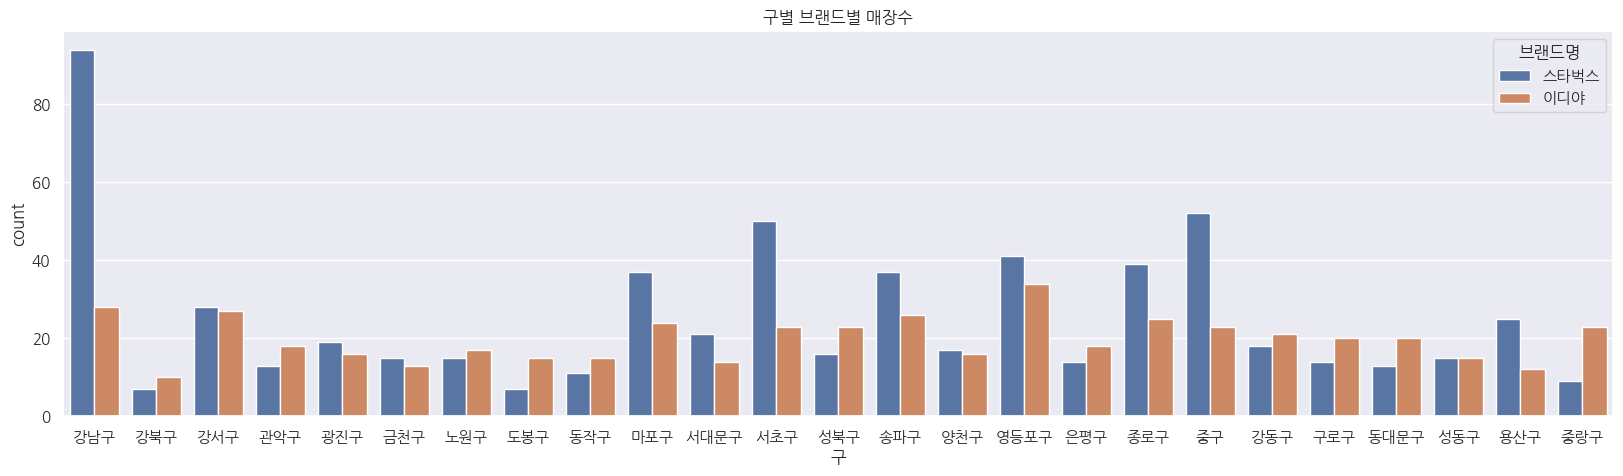

In [94]:
_, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data=df_total, x='구', hue='브랜드명')

plt.title('구별 브랜드별 매장수')
plt.show()

In [98]:
df_total[df_total['브랜드명'].str.contains('스타벅스') & df_total['구'].str.contains('강남구')].count()

브랜드명    94
매장명     94
구       94
주소      94
위도      94
경도      94
dtype: int64

In [ ]:
# Scatterplot 
df_total[['위도', '경도']].plot.scatter(x='경도', y='위도')
plt.show()

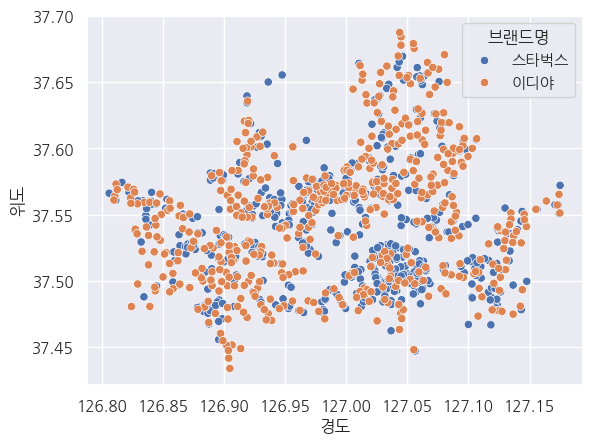

In [100]:
sns.scatterplot(data=df_total, x='경도', y='위도', hue='브랜드명')
plt.show()

##### 지도 시각화

In [110]:
df_total

,브랜드명,매장명,구,주소,위도,경도
0,스타벅스,스타벅스역삼아레나빌딩,강남구,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,스타벅스,스타벅스논현역사거리,강남구,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,스타벅스,스타벅스신사역성일빌딩,강남구,서울특별시 강남구 강남대로 584 (논현동),37.513931,127.020606
3,스타벅스,스타벅스국기원사거리,강남구,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,스타벅스,스타벅스대치재경빌딩,강남구,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583
...,...,...,...,...,...,...
1118,이디야,이디야커피가락,송파구,서울특별시 송파구 송이로 87,37.498338,127.120775
1119,이디야,이디야용산,용산구,서울특별시 용산구 한강대로 52-1,37.525419,126.964637
1120,이디야,이디야등촌3동성당점,강서구,서울특별시 강서구 강서로56길 110,37.558863,126.844857
1121,이디야,이디야커피중계,노원구,서울특별시 노원구 중계로14바길 2,37.649874,127.082558


In [114]:
map = folium.Map(location=[37.5566, 126.9884], zoom_start=12)

for i in df_total.index:
    cafe_lat = df_total.loc[i, '위도']
    cafe_lng = df_total.loc[i, '경도']
    title = f"{df_total.loc[i, '매장명']} / {df_total.loc[i, '주소']}"

    color = 'blue'  # 스타벅스는 파란색
    if df_total.loc[i, '브랜드명'] != '스타벅스' : color = 'orange' # 이디야는 오렌지색

    folium.CircleMarker(location=[cafe_lat, cafe_lng], radius=3, color=color, tooltip=title).add_to(map)

map

In [115]:
import json

In [118]:
geojson_data = './data/seoul_geo_simple.json'
seoul_geo = json.load(open(geojson_data, encoding='utf-8'))

gu_map = folium.Map(location=[37.5566, 126.9884], zoom_start=11)

folium.GeoJson(seoul_geo, name='서울특별시 행정구').add_to(gu_map)

for i in df_total.index:
    cafe_lat = df_total.loc[i, '위도']
    cafe_lng = df_total.loc[i, '경도']
    title = f"{df_total.loc[i, '매장명']} / {df_total.loc[i, '주소']}"

    color = 'blue'  # 스타벅스는 파란색
    if df_total.loc[i, '브랜드명'] != '스타벅스' : color = 'orange' # 이디야는 오렌지색

    folium.CircleMarker(location=[cafe_lat, cafe_lng], radius=3, color=color, tooltip=title).add_to(gu_map)

gu_map